In [1]:
from pylab import *
import matplotlib.pyplot as plt
import os

In [2]:
import pyAgrum as gum
import pyAgrum.lib.notebook as gnb

## Setup the network

In [3]:
bn=gum.fastBN("F<-L<-H->B->F;L->C")
bn

(pyAgrum.BayesNet<double>@0x7fbb588e2a00) BN{nodes: 5, arcs: 5, domainSize: 32, dim: 22}

## Initialize the distribuitions

In [4]:
bn.cpt('H').fillWith([0.8, 0.2])

(pyAgrum.Potential<double>@0x7fbb56ff5cc0) 
  H                |
0        |1        |
---------|---------|
 0.8000  | 0.2000  |

In [5]:
bn.cpt('B')[:] = [[0.95, 0.05], [0.75, 0.25]]
bn.cpt('B')

(pyAgrum.Potential<double>@0x7fbb5bab8670) 
      ||  B                |
H     ||0        |1        |
------||---------|---------|
0     || 0.9500  | 0.0500  |
1     || 0.7500  | 0.2500  |

In [6]:
1-0.00005

0.99995

In [7]:
bn.cpt('L')[:] = [[0.99995, 0.00005], [(1-0.003), 0.003]]
bn.cpt('L')

(pyAgrum.Potential<double>@0x7fbb5ba079a0) 
      ||  L                |
H     ||0        |1        |
------||---------|---------|
0     || 1.0000  | 0.0001  |
1     || 0.9970  | 0.0030  |

In [8]:
bn.cpt('F')[0,0,:] = [0.95, 0.05]
bn.cpt('F')[0,1,:] = [0.5, 0.5]
bn.cpt('F')[1,0,:] = [0.9, 0.1]
bn.cpt('F')[1,1,:] = [0.25, 0.75]
bn.cpt('F')

(pyAgrum.Potential<double>@0x7fbb56ff8570) 
             ||  F                |
L     |B     ||0        |1        |
------|------||---------|---------|
0     |0     || 0.9500  | 0.0500  |
1     |0     || 0.5000  | 0.5000  |
0     |1     || 0.9000  | 0.1000  |
1     |1     || 0.2500  | 0.7500  |

In [9]:
bn.cpt('C')[:] = [[0.98, 0.02], [0.4, 0.6]]
bn.cpt('C')

(pyAgrum.Potential<double>@0x7fbb5ba3b820) 
      ||  C                |
L     ||0        |1        |
------||---------|---------|
0     || 0.9800  | 0.0200  |
1     || 0.4000  | 0.6000  |

In [10]:
from IPython.core.display import HTML

## Initialize the belief propagation

In [11]:
ie=gum.LazyPropagation(bn)

## Get Final Answer

In [12]:
ie.evidenceJointImpact(['B','L'],['H','C'])

(pyAgrum.Potential<double>@0x7fbb56fe6220) 
                    ||  B                |
L     |C     |H     ||0        |1        |
------|------|------||---------|---------|
0     |0     |0     || 0.9500  | 0.0500  |
1     |0     |0     || 0.0000  | 0.0000  |
0     |1     |0     || 0.9486  | 0.0499  |
1     |1     |0     || 0.0014  | 0.0001  |
0     |0     |1     || 0.7491  | 0.2497  |
1     |0     |1     || 0.0009  | 0.0003  |
0     |1     |1     || 0.6879  | 0.2293  |
1     |1     |1     || 0.0621  | 0.0207  |

The Final answer is 0.6879. This is the maximum of the joint distributions of the combinations of b and l. Which at the bottom four boxes in the above figure

## Do the work

# B = 1, L = 1

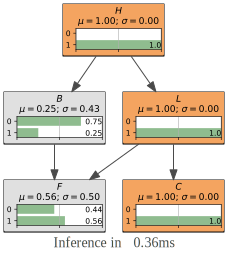

In [13]:
gnb.showInference(bn,evs={"H":1,"L":1,"C":1},size="5")

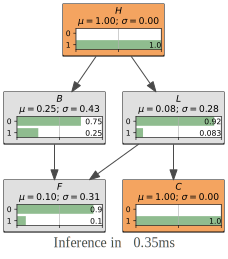

In [14]:
gnb.showInference(bn,evs={"H":1, "C":1},size="5")

In [15]:
answers = []

In [16]:
answers.append(0.083 * 0.25)

# B = 0, L = 1

In [17]:
answers.append(0.75 * 0.083)

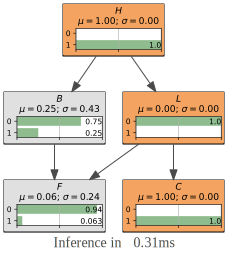

In [18]:
gnb.showInference(bn,evs={"H":1,"L":0,"C":1},size="5")

## B = 1, L = 0

In [19]:
answers.append(0.25 * 0.92)

## B = 0, L = 0

In [20]:
answers.append(0.75 * 0.92)

In [21]:
print(answers)

[0.02075, 0.06225, 0.23, 0.6900000000000001]


In [22]:
max(answers)

0.6900000000000001

## We see that the maximum is 0.69 which is a rounding error from the original Maths